In [1]:
import iris
import numpy as np
from iris.coord_categorisation import add_day_of_year
import os
os.chdir("/home/548/eh6215/Desktop/python/ASoP/ASoP-Coherence")
import asop_coherence
import iris
import numpy as np
import matplotlib.pyplot as plt
import iris.plot as iplt
import cartopy.crs as ccrs
from iris.coord_categorisation import add_hour

KeyboardInterrupt: 

In [ ]:
topo = iris.load_cube("/home/548/eh6215/orog.nc")
topo.coord('longitude').guess_bounds()
topo.coord('latitude').guess_bounds()
topo.coord('longitude').coord_system=None
topo.coord('latitude').coord_system=None

params = {"BARPAC-M": {'dt':3600*3, 'dx':5, 'dy':5, 'legend_name':'BARPAC-M', 'name':'BARPAC-M', 'region':[-45,-30,140,155], 'box_size':200, 'color':'tab:red',   'region_size':9, 'lag_length':10, 'autocorr_length':60*60*24*5},
          "BARPAC-T": {'dt':3600*3, 'dx':4, 'dy':4, 'legend_name':'BARPAC-T', 'name':'BARPAC-T', 'region':[-45,-30,140,155], 'box_size':200, 'color':'tab:blue', 'region_size':9, 'lag_length':10, 'autocorr_length':60*60*24*5},
          "BARPAR-M": {'dt':3600*3, 'dx':5, 'dy':5, 'legend_name':'BARPAR-M', 'name':'BARPAR-M', 'region':[-30,-10,140,155], 'box_size':200, 'color':'tab:green',  'region_size':9, 'lag_length':10, 'autocorr_length':60*60*24*5},
          "BARPAR-T": {'dt':3600*3, 'dx':5, 'dy':5, 'legend_name':'BARPAR-T', 'name':'BARPAR-T', 'region':[-30,-10,140,155], 'box_size':200, 'color':'tab:orange', 'region_size':9, 'lag_length':10, 'autocorr_length':60*60*24*5}}

In [ ]:
path1 = "/g/data/tp28/BARPA/trials/{domain}*/era/erai/historical/r0/pp_unified/3hourly/av_prcp_rate/0p05deg/{year}/"
path2 = "/short/tp28/eh6215/ESCI/3hr_BARPAC-T/"

years = {'El Nino':[1991,1997],'La Nina':[1998,2007,2010]}

data ={'El Nino':{},'La Nina':{}}
for key in years:
    for name in ["BARPAC-M","BARPAC-T","BARPA-E"]:
        data[key][name]=iris.load([path2+"regrid_%s_%d.nc"%(name,year) for year in years[key]])
        iris.util.equalise_attributes(data[key][name])
        data[key][name]=data[key][name].concatenate_cube()
        mask = topo.regrid(data[key][name],iris.analysis.AreaWeighted())
        data[key][name].data.mask += mask.data < 1
    data[key]['BARPAC-T'] = data[key]['BARPAC-T']/3
            


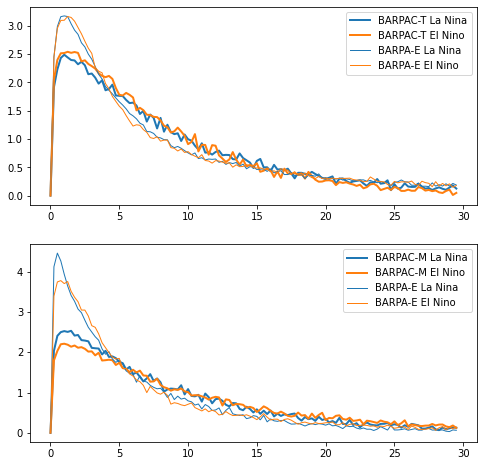

In [38]:
for region in ['M','T']:
        lat =iris.coords.AuxCoord({'M':np.arange(-45,-30,0.25),'T':np.arange(-30,-10,0.25)}[region],standard_name='latitude',units='degrees')
        lon =iris.coords.AuxCoord(np.arange(140,155,0.25),standard_name='longitude',units='degrees')
        
cx =iris.Constraint(longitude=lambda x:140<=x<=155)
cy ={'M':iris.Constraint(latitude=lambda y:-44<=y<=-30),'T':iris.Constraint(latitude=lambda y:-30<=y<=-10)}
plt.figure(figsize=(8,8))
plt.subplot(211)
for j,name in enumerate(["BARPAC-T","BARPA-E"]):
    for i,year in enumerate(['La Nina','El Nino']):
        x = [a for a in data[year][name][:720].extract(cx&cy['T']).data.filled(-1).flatten()/8 if a>0]
        h,b = np.histogram(x,bins=np.arange(0,30,0.25))
        plt.plot(b[:-1],100*h*b[:-1]/(h*b[:-1]).sum(),c=['tab:blue','tab:orange'][i],lw=2-j,label="%s %s"%(name,year))
                           
plt.legend()
plt.subplot(212)
for j,name in enumerate(["BARPAC-M","BARPA-E"]):
    for i,year in enumerate(['La Nina','El Nino']):
        x = [a for a in data[year][name][:720].extract(cx&cy['M']).data.filled(-1).flatten()/8 if a>0]
        h,b = np.histogram(x,bins=np.arange(0,30,0.25))
        plt.plot(b[:-1],100*h*b[:-1]/(h*b[:-1]).sum(),c=['tab:blue','tab:orange'][i],lw=2-j,label="%s %s"%(name,year))
                           
plt.legend()

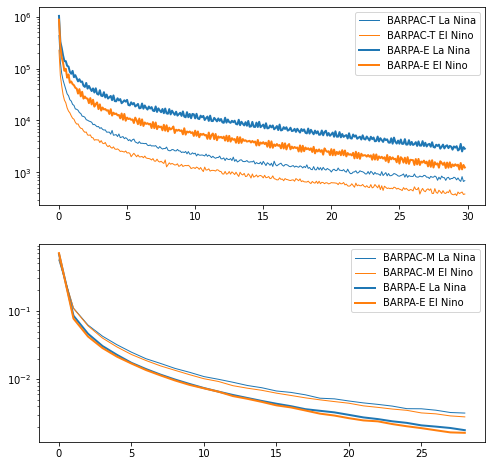

In [43]:
plt.figure(figsize=(8,8))
plt.subplot(211)
for j,name in enumerate(["BARPAC-T","BARPA-E"]):
    for i,year in enumerate(['La Nina','El Nino']):
        h,b = np.histogram(data[year][name].extract(cx&cy['T']).data.flatten(),bins=np.arange(0,30,0.1))
        plt.plot(b[:-1],h,c=['tab:blue','tab:orange'][i],lw=j+1,label="%s %s"%(name,year))
        plt.semilogy()
                           
plt.legend()
plt.subplot(212)
for j,name in enumerate(["BARPAC-M","BARPA-E"]):
    for i,year in enumerate(['La Nina','El Nino']):
        h,b = np.histogram(data[year][name].extract(cx&cy['M']).data.flatten(),bins=np.arange(0,30,1),density=1)
        plt.plot(b[:-1],h,c=['tab:blue','tab:orange'][i],lw=j+1,label="%s %s"%(name,year))
        plt.semilogy()
                           
plt.legend()

---> Plotting 2D histogram


<Figure size 1440x1440 with 0 Axes>

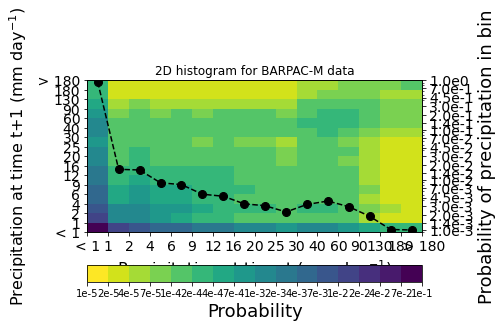

In [108]:
plt.figure(figsize=(20,20))
asop_coherence.plot_histogram(oned_hist,twod_hist,params['BARPAC-M'],bins)

In [4]:
params = {"BARPAC-M":{'dt':3600*3,'dx':5,'dy':5,'legend_name':'BARPAC-M','name':'BARPAC-M','region':[-45,-30,135,155],'box_size':200,'color':'tab:red','region_size':20,'lag_length':10,'autocorr_length':60*60*24*5},
          "BARPAC-T":{},
          "BARPA-E":{}}

In [49]:
corr_map,lag_vs_distance,autocorr,npts_map,npts = asop_coherence.compute_equalgrid_corr(data['El Nino']['BARPAC-M'][:720],params['BARPAC-M'])

---> Computing correlations for 9x9 sub-regions
----> Info: Size of domain in native gridpoints: 60 longitude x 60 latitude.
----> Info: There are 36 9x9 sub-regions in your input data.


/home/548/eh6215/Desktop/python/ASoP/ASoP-Coherence/asop_coherence.py:344: RuntimeWarning: invalid value encountered in true_divide
  corr_map = corr_map/npts_map


In [ ]:
all_distance_correlations,all_distance_ranges,all_distance_max = asop_coherence.compute_equalarea_corr(data['BARPAC-M'],params['BARPAC-M'])

---> Computing correlations for 200x200 km sub-boxes.
----> Info: Sub-boxes are 40x40 gridboxes in this model (nx x ny).


In [46]:
all_time_correlations,all_time_max = asop_coherence.compute_autocorr(data['El Nino']['BARPAC-M'][:720],params['BARPAC-M'])

NameError: name 'params' is not defined

In [50]:
asop_coherence.plot_equalgrid_corr(corr_map,lag_vs_distance,autocorr,npts,params['BARPAC-M'])

---> Plotting correlation maps for 9x9 sub-regions


NameError: name 'cfp' is not defined

In [1]:
import pickle
import os
os.chdir("/home/548/eh6215/Desktop/python/ASoP/ASoP-Coherence")
import asop_coherence
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from six.moves import range



In [2]:
hist1,hist2 = {'BARPAR_M':0, 'BARPAC_M':0, 'BARPAR_T':0, 'BARPAC_T':0}, \
              {'BARPAR_M':0, 'BARPAC_M':0, 'BARPAR_T':0, 'BARPAC_T':0}

n = 0
for year in range(1991,2009):
    try:
        n += 1
        tmp = pickle.load(open("/short/tp28/eh6215/ESCI/ASoP/coherence_%d2.pickle"%year,'rb'))
        for key in hist1.keys():
            hist1[key]+=tmp[0][key]
            hist2[key]+=tmp[1][key]
    except FileNotFoundError:
        continue
        
for key in hist1.keys():
    hist1[key]= hist1[key]/n
    hist2[key]= hist2[key]/n

In [3]:
params = {"BARPAC_M": {'dt':3600*3, 'dx':5, 'dy':5, 'legend_name':'BARPAC-M', 'name':'BARPAC-M', 'region':[-45,-30,140,155], 'box_size':200, 'color':'tab:red',   'region_size':21, 'lag_length':10, 'autocorr_length':60*60*24*5},
          "BARPAC_T": {'dt':3600*3, 'dx':4, 'dy':4, 'legend_name':'BARPAC-T', 'name':'BARPAC-T', 'region':[-45,-30,140,155], 'box_size':200, 'color':'tab:blue', 'region_size':21, 'lag_length':10, 'autocorr_length':60*60*24*5},
          "BARPAR_M": {'dt':3600*3, 'dx':5, 'dy':5, 'legend_name':'BARPAR-M', 'name':'BARPAR-M', 'region':[-30,-10,140,155], 'box_size':200, 'color':'tab:green',  'region_size':21, 'lag_length':10, 'autocorr_length':60*60*24*5},
          "BARPAR_T": {'dt':3600*3, 'dx':5, 'dy':5, 'legend_name':'BARPAR-T', 'name':'BARPAR-T', 'region':[-30,-10,140,155], 'box_size':200, 'color':'tab:orange', 'region_size':21, 'lag_length':10, 'autocorr_length':60*60*24*5}}

bins=[0,0.5,1,2,4,6,9,12,16,20,25,30,40,60,90,130,180,2e20]
    
  

In [22]:
  
def plot_histogram(oned_hist,twod_hist,model_dict,bins,fig,ax,title=True,colorbar=True,wk_dir='.',ext='.ps'):    
    nbins = np.size(oned_hist)
    hist_con_levs=[1e-5,2e-5,4e-5,7e-5,1e-4,2e-4,4e-4,7e-4,1e-3,2e-3,4e-3,7e-3,1e-2,2e-2,4e-2,7e-2,1e-1]
    #fig = plt.figure()
    #ax = fig.add_subplot(111)
    cmap = plt.cm.get_cmap("viridis_r")
    norm = BoundaryNorm(hist_con_levs,ncolors=cmap.N,clip=True)
    contour = ax.pcolormesh(np.arange(nbins+1),np.arange(nbins+1),twod_hist,cmap=cmap,norm=norm)
    """
    if colorbar == True:
        cbar = fig.colorbar(contour,orientation='horizontal',ticks=hist_con_levs)
        cbar.ax.set_xlabel('Probability',fontsize=18)
        cbar.ax.set_xticklabels(['1e-5','2e-5','4e-5','7e-5','1e-4','2e-4','4e-4','7e-4','1e-3','2e-3','4e-3','7e-3','1e-2','2e-2','4e-2','7e-2','1e-1'])
    ax.set_xlabel('Precipitation at time t (mm day$^{-1}$)',fontsize=16)
    ax.set_ylabel('Precipitation at time t+1 (mm day$^{-1}$)',fontsize=16)
    ticklabels=['< '+str(bins[1])]
    for bin in range(1,nbins):
        ticklabels.append(str(bins[bin]))
    ticklabels.append(' > '+str(bins[nbins-1]))
    ax.set_xticks(np.arange(nbins+1))
    ax.set_xticklabels(ticklabels,fontsize=14)
    ax.set_yticks(np.arange(nbins+1))
    ax.set_yticklabels(ticklabels,fontsize=14)
    if title == True:
        title_string = '2D histogram for '+model_dict['legend_name']
        if 'time_desc' in model_dict:
            title_string = title_string+' '+model_dict['time_desc']
        if 'grid_desc' in model_dict:
            title_string = title_string+' '+model_dict['grid_desc']
        if 'region_desc' in model_dict:
            title_string = title_string+' - '+model_dict['region_desc']
        title_string = title_string + ' data'
        ax.set_title(title_string)
    ax.axis([0,nbins,0,nbins])
    ax.set_xlim(xmin=0,xmax=nbins)
    plot_name=wk_dir+'/asop_coherence.'+model_dict['name']
    if 'grid_type' in model_dict:
        plot_name=plot_name+'_'+model_dict['grid_type']
    if 'time_type' in model_dict:
        plot_name=plot_name+'_'+model_dict['time_type']
    if 'region_name' in model_dict:
        plot_name=plot_name+'_'+model_dict['region_name'].replace(" ","_")
    plot_name=plot_name+'_precip_twodpdf'+ext
"""

In [5]:
#fig = plt.figure()
for i,key in enumerate(hist1.keys()):
    plt.subplot(2,2,i+1)
#    plot_histogram(hist1[key],hist2[key],params[key],bins,fig,ax)
#    oned_hist=hist1[key]
#    twod_hist=hist2[key]
#    nbins = np.size(oned_hist)
#    hist_con_levs=[1e-5,2e-5,4e-5,7e-5,1e-4,2e-4,4e-4,7e-4,1e-3,2e-3,4e-3,7e-3,1e-2,2e-2,4e-2,7e-2,1e-1]
#    #fig = plt.figure()
#    #ax = fig.add_subplot(111)
#    cmap = plt.cm.get_cmap("viridis_r")
#    norm = BoundaryNorm(hist_con_levs,ncolors=cmap.N,clip=True)
#    contour = ax.pcolormesh(np.arange(nbins+1),np.arange(nbins+1),twod_hist,cmap=cmap,norm=norm)    


In [6]:
plt.plot([1,2,3])

In [21]:
hist1[key]

array([0.87056162, 0.00624533, 0.0070449 , 0.00772123, 0.00476013,
       0.00488169, 0.00353229, 0.00360012, 0.00282765, 0.00283583,
       0.00231949, 0.00363328, 0.00501612, 0.004769  , 0.0039652 ,
       0.00308929, 0.00764128])

In [42]:
data

{1991: {'BARPAC-M': <iris 'Cube' of stratiform_rainfall_flux / (mm/day) (time: 728; latitude: 60; longitude: 60)>,
  'BARPAC-T': <iris 'Cube' of unknown / (1.15740740740741e-08 m.s-1) (time: 728; latitude: 80; longitude: 60)>,
  'BARPA-E': <iris 'Cube' of precipitation_flux / (mm/day) (time: 728; latitude: 140; longitude: 60)>},
 1994: {'BARPAC-M': <iris 'Cube' of stratiform_rainfall_flux / (mm/day) (time: 720; latitude: 60; longitude: 60)>,
  'BARPAC-T': <iris 'Cube' of unknown / (1.15740740740741e-08 m.s-1) (time: 720; latitude: 80; longitude: 60)>,
  'BARPA-E': <iris 'Cube' of precipitation_flux / (mm/day) (time: 720; latitude: 140; longitude: 60)>}}

In [56]:
topo = iris.load("/home/548/eh6215/orog.nc")


In [57]:
topo

[<iris 'Cube' of surface_altitude / (m) (latitude: 458; longitude: 798)>]

In [39]:
for idata

{'El Nino': {'BARPAC-M': <iris 'Cube' of stratiform_rainfall_flux / (mm/day) (time: 1448; latitude: 60; longitude: 60)>,
  'BARPAC-T': <iris 'Cube' of unknown / (1.15740740740741e-08 m.s-1) (time: 1448; latitude: 80; longitude: 60)>,
  'BARPA-E': <iris 'Cube' of precipitation_flux / (mm/day) (time: 1448; latitude: 140; longitude: 60)>},
 'La Nina': {'BARPAC-M': <iris 'Cube' of stratiform_rainfall_flux / (mm/day) (time: 2168; latitude: 60; longitude: 60)>,
  'BARPAC-T': <iris 'Cube' of unknown / (1.15740740740741e-08 m.s-1) (time: 2168; latitude: 80; longitude: 60)>,
  'BARPA-E': <iris 'Cube' of precipitation_flux / (mm/day) (time: 2168; latitude: 140; longitude: 60)>}}